# Segmentation clustering of the customers in the mall

## Using the K-means and Hierarchial Clustering

## Project: Customer segmentation using K-Means clustering

#### In this project, I will perform a cluster segmentation on a dataset of mall customers. 
#### I'll analyze the data, and apply K-Means, hierarchical clustering, to identify cluster of customers based on their annual income and spending score.

In [2]:
# 1. Importing libraries
# I'll start by importing the key libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# 2. Loading the dataset
# I'll load the dataset of mall customers. The dataset includes:
# - Unique customer ID
# - Gender
# - Age
# - Annual Income (k$)
# - Spending Score in range of 1 to 100

df = pd.read_csv("/Users/amastikbayev/Downloads/Mall_Customers.csv")

# Preview the first 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# 3. Exploratory Data Analysis (EDA)

# Let's gather basic information about the dataset:
df.describe()  # Statistical summary of numerical features
df.info()      # Data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### I want to understand the distribution of gender, age, income, and spending. 

In [5]:
# 4. Gender distribution and basic group analysis

# Count how many customers are of each gender.
print("Count of customers by gender:")
print(df['Gender'].value_counts(), "\n")

# Compare the average values of numerical features by gender.
print("Mean values of features by gender:")
print(df.groupby('Gender').mean())

Count of customers by gender:
Gender
Female    112
Male       88
Name: count, dtype: int64 

Mean values of features by gender:
        CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                                   
Female   97.562500  38.098214           59.250000               51.526786
Male    104.238636  39.806818           62.227273               48.511364


### A barchart is a good way to visualize the number of customers by gender.

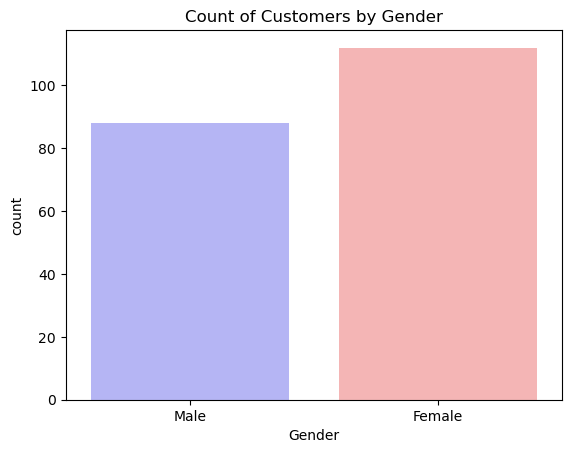

In [44]:
# 5. Visualizing gender distribution

sns.countplot(x="Gender", data=df, hue="Gender", palette="bwr", dodge=False)
plt.legend([],[], frameon=False)
plt.title("Count of Customers by Gender")
plt.show()

In [7]:
# 6. Checking for missing values
df_mv = df.isna().any()
print("Columns with missing values:")
print(df_mv)

# It's also good to check the shape of the dataset:
print("Shape of the dataset:", df.shape)

Columns with missing values:
CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool
Shape of the dataset: (200, 5)


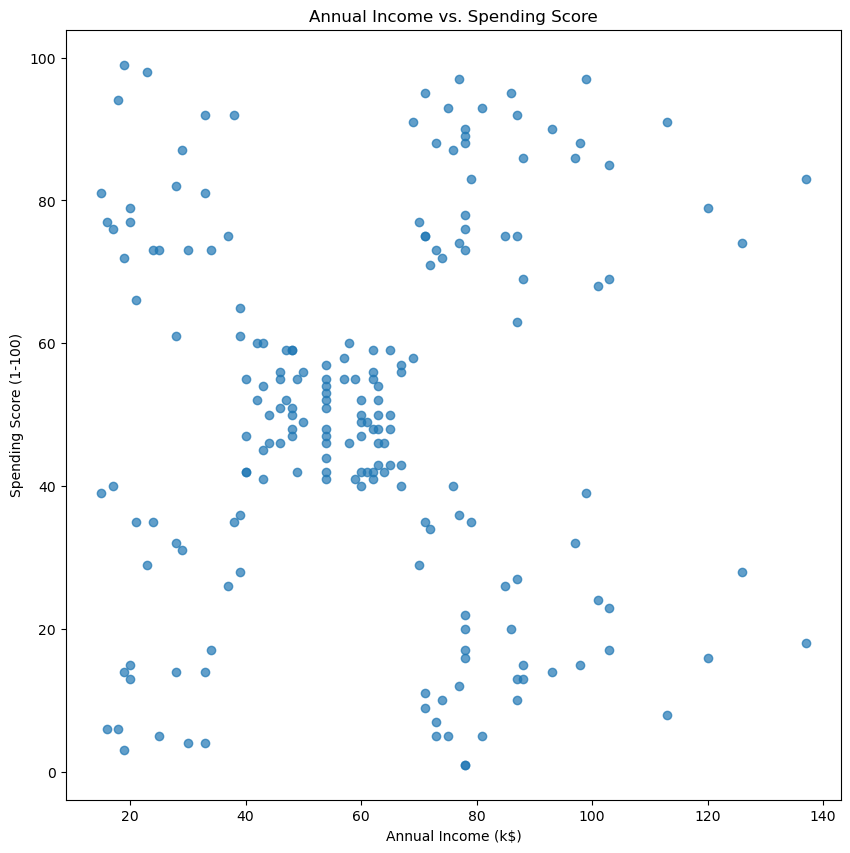

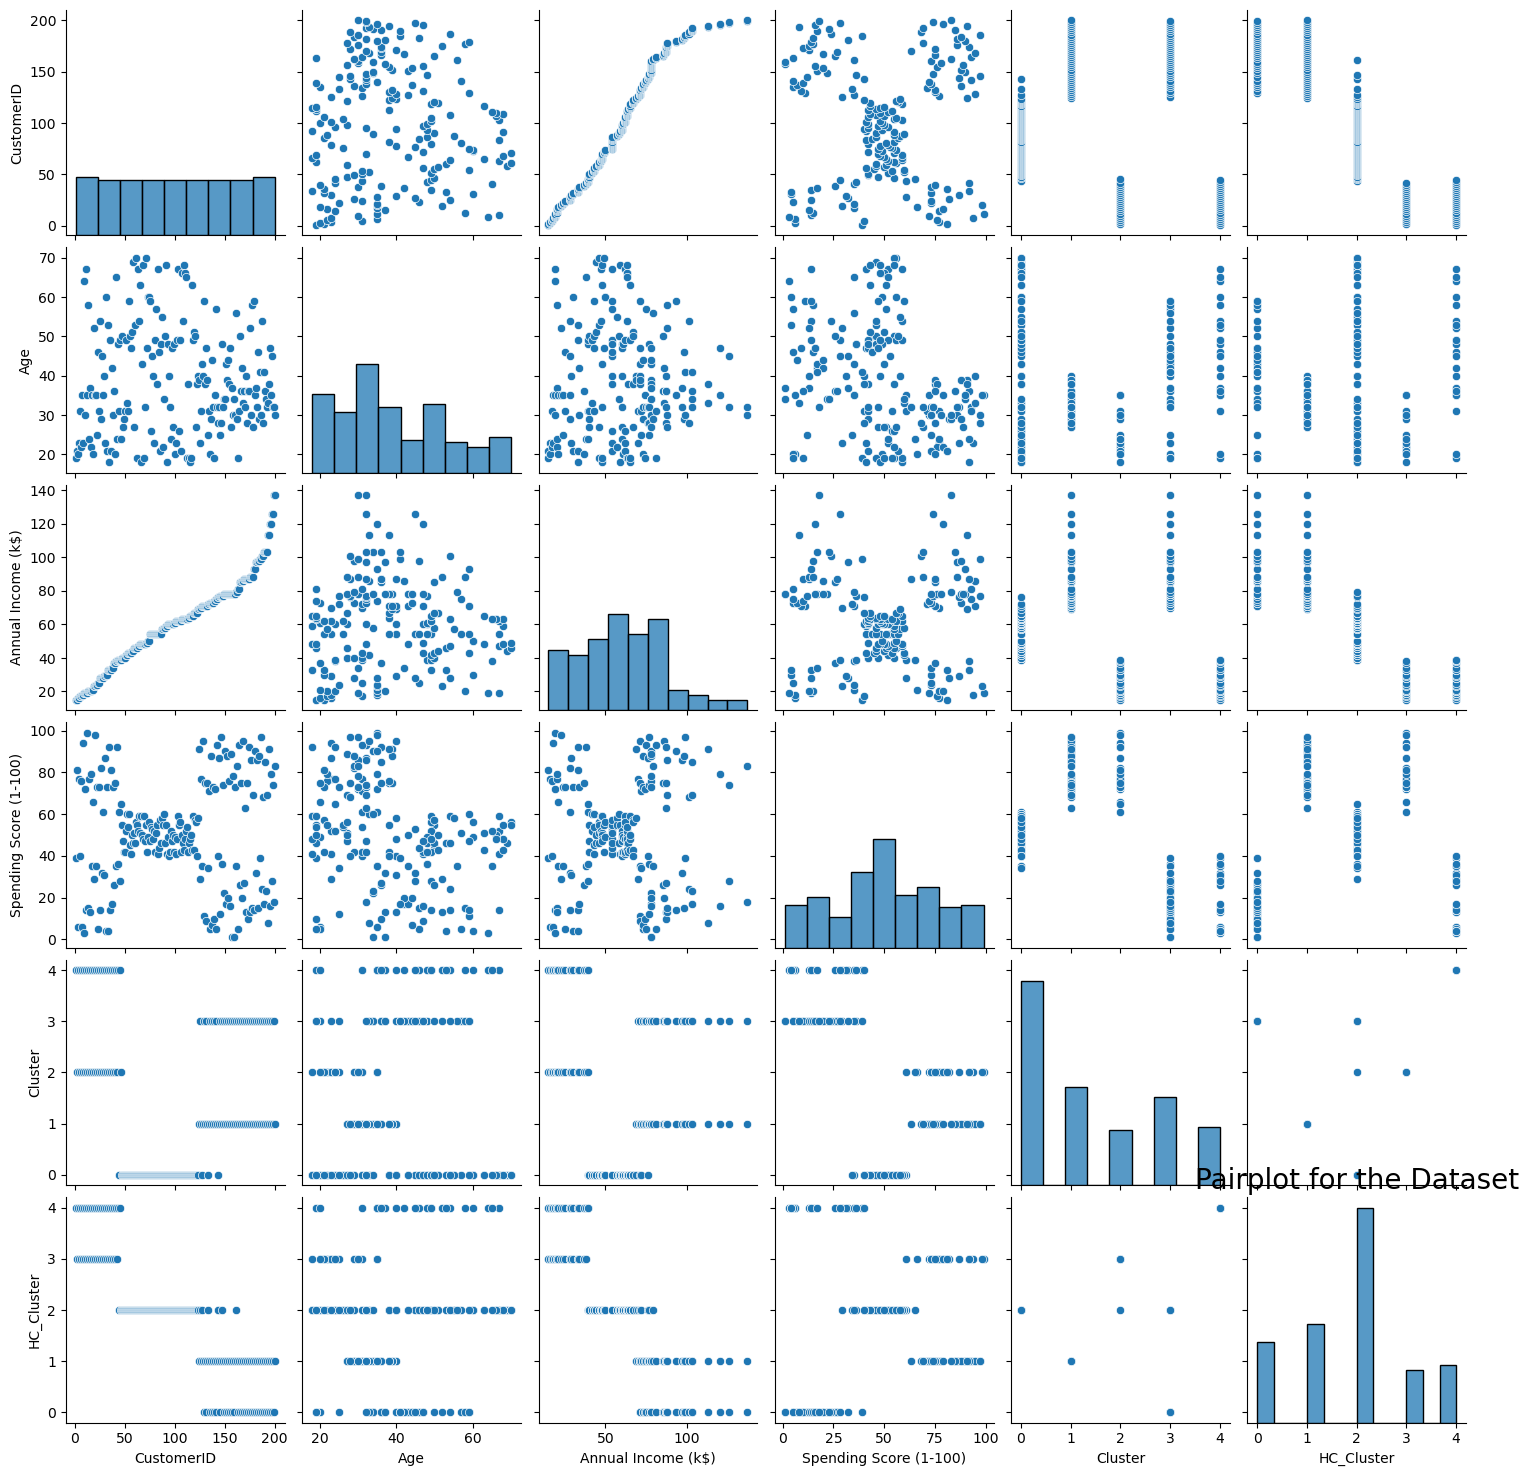

In [49]:
# 7. Visualizing the relationship between annual income and spending score

# Let's create a scatter plot to understand how Annual Income relates to Spending Score.
plt.figure(figsize = (10, 10))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Annual Income vs. Spending Score")
plt.show()

# Pairplot for multiple variables:
sns.pairplot(df)
plt.title('Pairplot for the Dataset', fontsize = 20)
plt.show()

### A boxplot will help visualize the distribution of spending scores between genders.

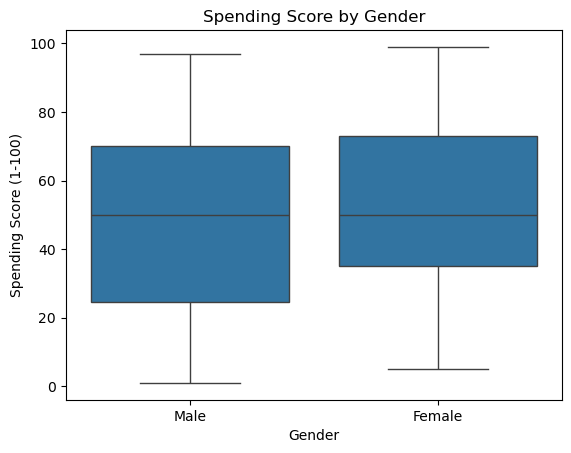

In [9]:
# 8. Boxplot: Gender vs Spending score

plt.figure()
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df)
plt.title("Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")
plt.show()

### For clustering, we'll focus on the numerical features that are most relevant. And in this case, let's consider: annual income and spending score

In [10]:
# 9a. Feature selection for clustering
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [ ]:
# 9b. Scaling the data helps K-Means converge more efficiently and treat all features equally.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### I will run K-Means for a range of cluster counts (1 to 10) and plot the inertia.
### I use an "elbow" method in the plot and observe where the reduction in inertia starts to taper off.

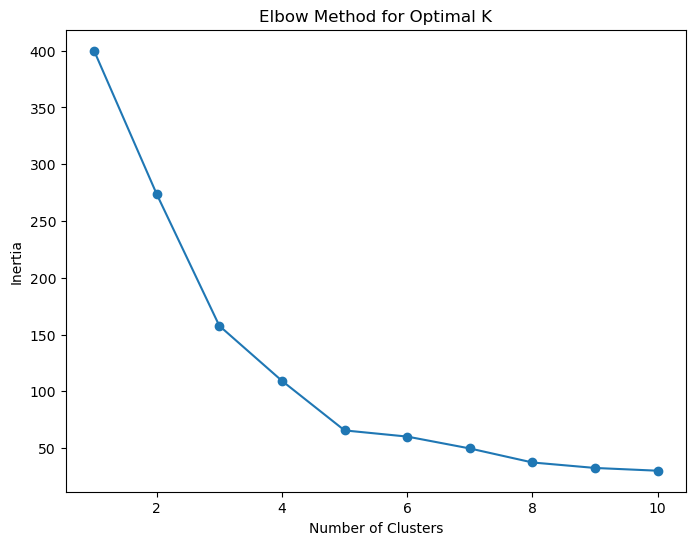

How many clusters should be selected for the model?  5


In [11]:
# 10. Choosing the optimal number of clusters with the elbow method

inertia = []
K = range(1, 11)  # Test from 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve:
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# After visually inspecting the plot, I choose the number of clusters.
n_clusters = int(input("How many clusters should be selected for the model? "))

Cluster assignment counts:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


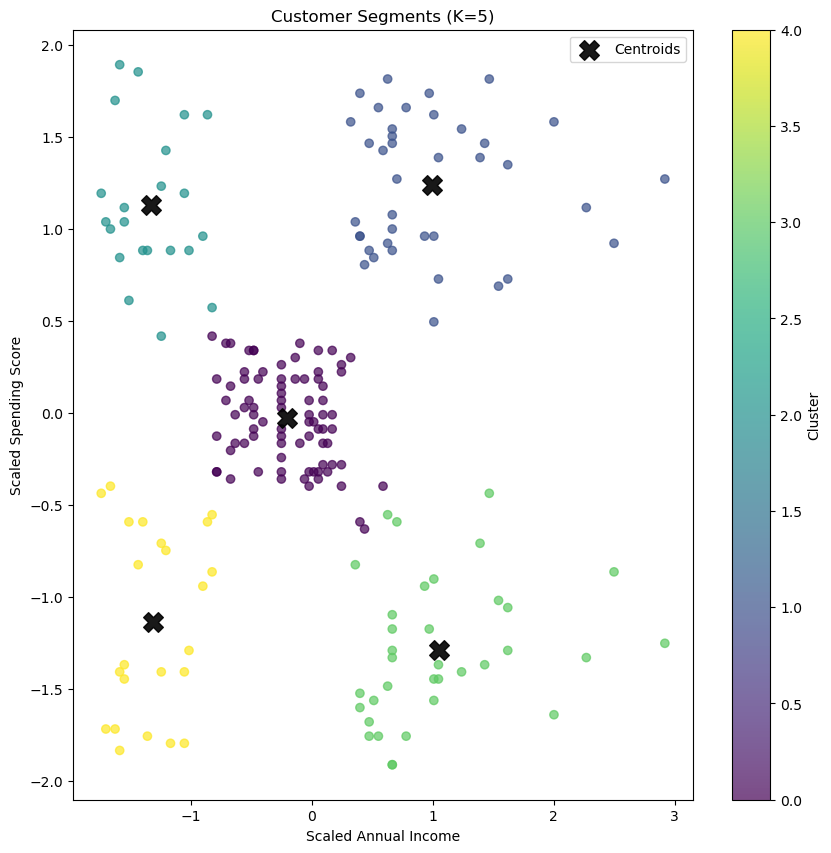

In [12]:
# 11. Applying K-Means with the Chosen Number of Clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)

# Adding the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

print("Cluster assignment counts:")
print(df['Cluster'].value_counts())

# Retrieving the cluster centroids
centroids = kmeans.cluster_centers_

# Let's visualize the clusters formed on the two features.
plt.figure(figsize=(10, 10))
scatter = plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title(f"Customer Segments (K={n_clusters})")
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")

# Plotting the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='black', 
            s=200, # Larger size for emphasis
            alpha=0.9, 
            marker='X', 
            label='Centroids')

# Adding a legend. The scatter is ignored since the legend would just show a colorbar.
plt.legend()

plt.colorbar(scatter, label='Cluster')
plt.show()

In [17]:
# 12. Printing the centroids
print(df.groupby('Cluster')[["Annual Income (k$)", "Spending Score (1-100)"]].mean())

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


# Cluster Descriptions:


## Cluster 0: Middle-income customers with balanced spending. Represents an average customer segment.

## Cluster 1: High-income customers who are high spenders. Likely a valuable segment for premium products or services.

## Cluster 2: Low-income customers who are active spenders, possibly seeking affordable but high-value products.

## Cluster 3: These customers have high incomes but low spending habits, indicating they may be conservative or selective in their spending.

## Cluster 4: Low-income customers with minimal spending, likely requiring cost-effective or budget-friendly options.

# Hierarchical Clustering

In [55]:
# 1. Importing libraries needed for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [57]:
# 2. Creating the linkage matrix
# I use the 'ward' linkage which minimizes the variance within clusters.
Z = linkage(scaled_features, method='ward')

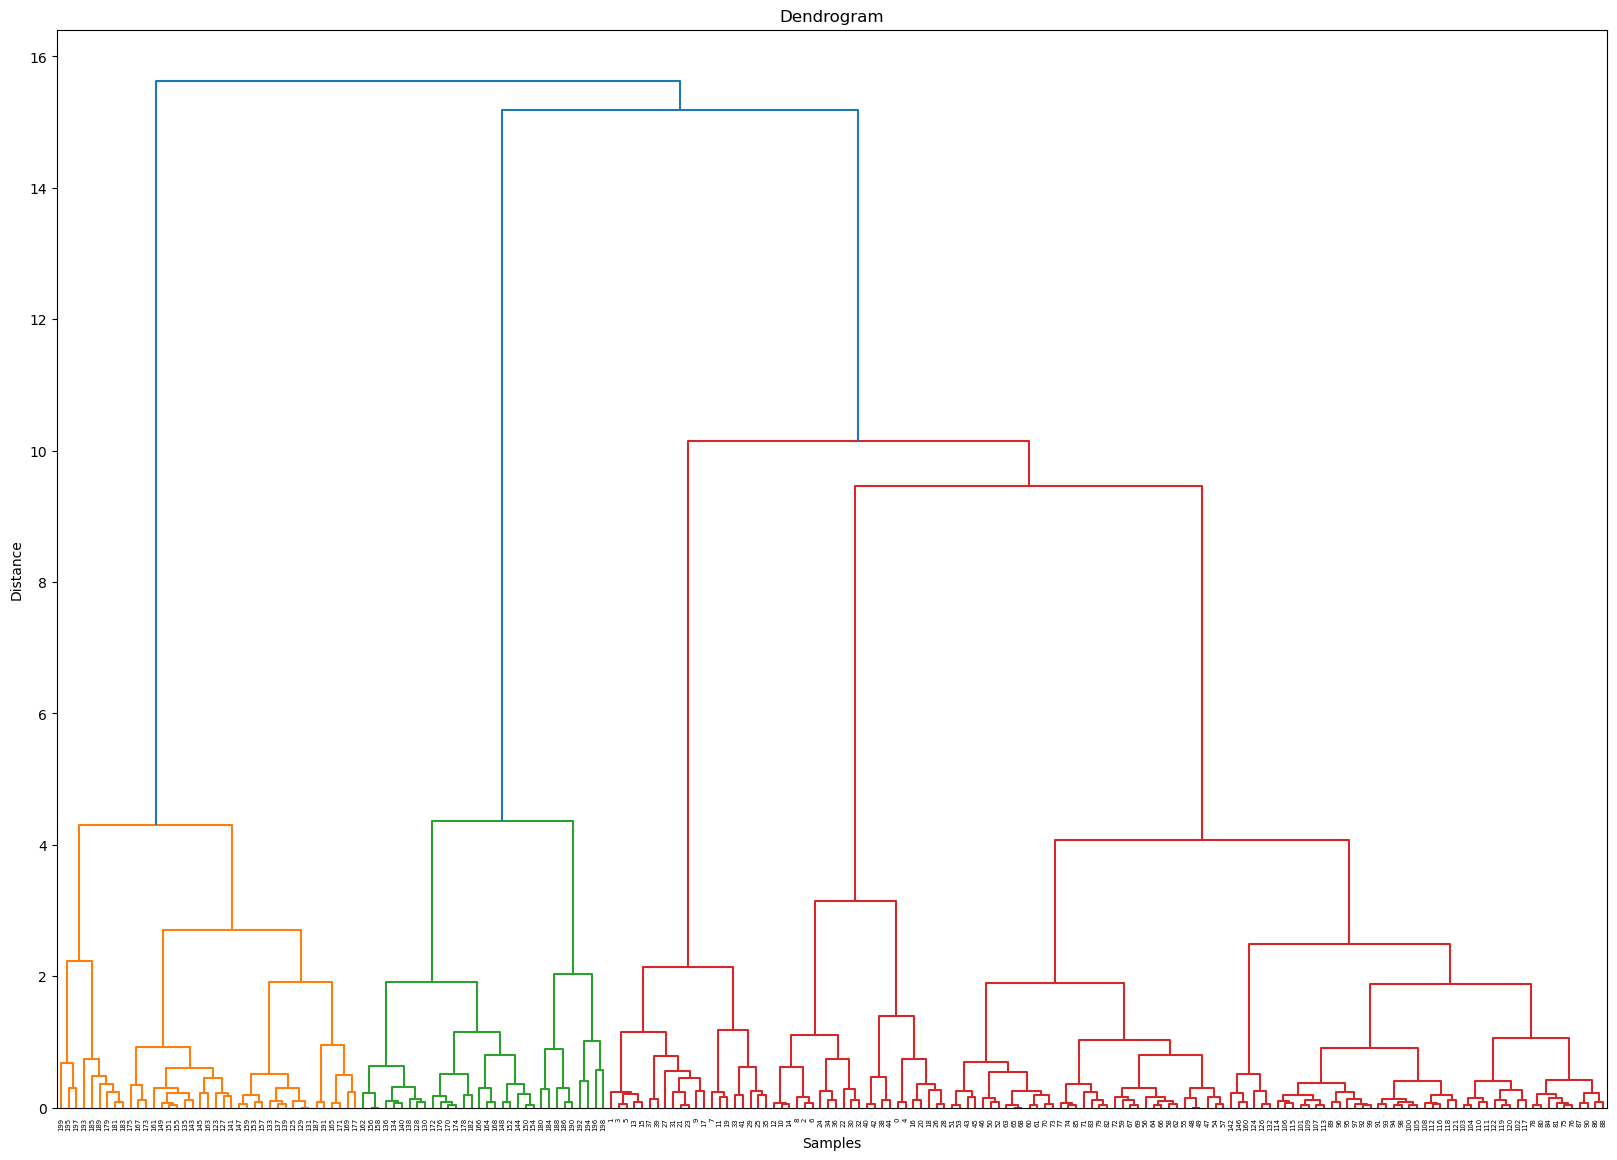

In [59]:
# 3. Plotting the dendrogram
plt.figure(figsize=(20, 14))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [76]:
# After visually inspecting the plot, I choose the number of clusters.
n_clusters = int(input("How many clusters should be selected for the model? "))

How many clusters should be selected for the model?  5


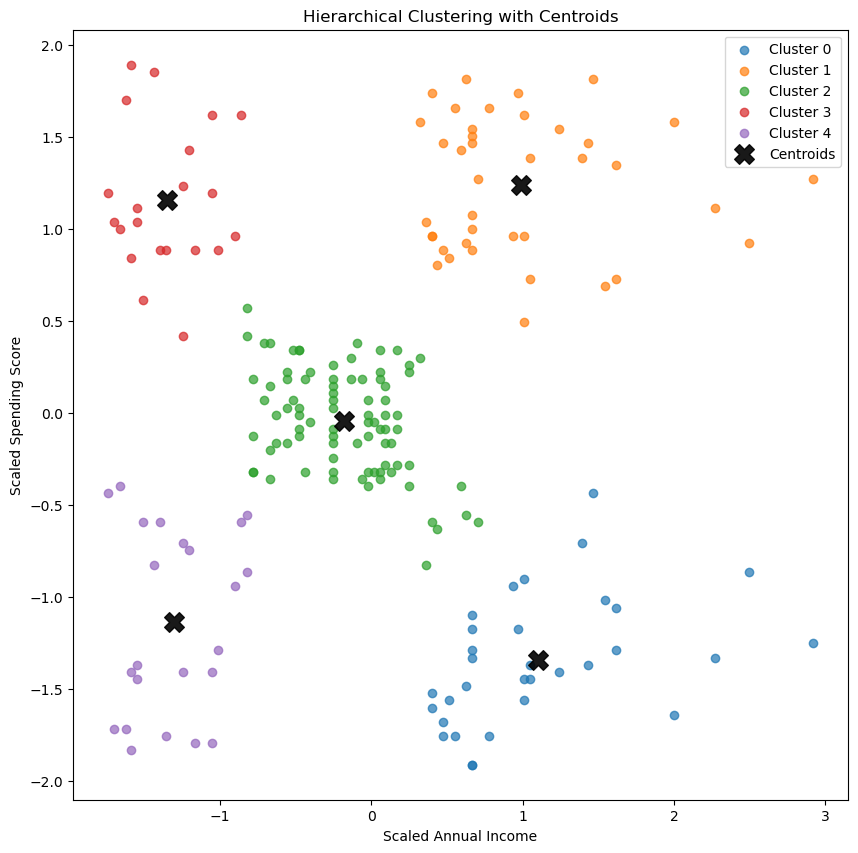

Hierarchical Clustering Cluster Summary:
             Annual Income (k$)  Spending Score (1-100)
HC_Cluster                                            
0                    89.406250               15.593750
1                    86.538462               82.128205
2                    55.811765               49.129412
3                    25.095238               80.047619
4                    26.304348               20.913043


In [78]:
# 4. Showing the clusters

# Fit Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters = hc_n_clusters, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_features)

# Add the cluster labels to the dataframe
df['HC_Cluster'] = hc_labels

# Calculate and plot centroids for hierarchical clusters
hc_centroids = np.array([scaled_features[hc_labels == c].mean(axis=0) for c in range(hc_n_clusters)])

plt.figure(figsize=(10, 10))
for cluster_label in range(hc_n_clusters):
    plt.scatter(
        scaled_features[hc_labels == cluster_label][:, 0],
        scaled_features[hc_labels == cluster_label][:, 1],
        label=f"Cluster {cluster_label}",
        alpha=0.7,
    )

# Plot hierarchical cluster centroids
plt.scatter(hc_centroids[:, 0], hc_centroids[:, 1], 
            c='black', s=200, alpha=0.9, marker='X', label='Centroids')
plt.title("Hierarchical Clustering with Centroids")
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()

# Summarize hierarchical clusters by mean values
hc_cluster_summary = df.groupby('HC_Cluster')[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("Hierarchical Clustering Cluster Summary:\n", hc_cluster_summary)

# Cluster Descriptions:

## Cluster 0: These customers have high incomes but low spending habits, indicating they may be conservative or selective in their spending.

## Cluster 1: High-income customers who are high spenders. Likely a valuable segment for premium products or services.

## Cluster 2: Middle-income customers with balanced spending. Represents an average customer segment.

## Cluster 3: Low-income customers who are active spenders, possibly seeking affordable but high-value products.

## Cluster 4: Low-income customers with minimal spending, likely requiring cost-effective or budget-friendly options.

# Key Insights:
### Both K-Means and Hierarchical Clustering deliver similar groupings for this dataset. And both methods effectively segment customers based on income and spending scores into meaningful clusters.